# XGBoost

## Load data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from collections import defaultdict
import datetime
import pickle
import math
import os
from xgboost import plot_importance
from scipy.stats import skew, norm
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None) # no truncate columns

In [2]:
# Environment settings
data_path_out = 'Data/output/'
    
# Deserialize previously saved data from "data-visualization"
with open(data_path_out + 'train_pp.obj', 'rb') as file:
    all_train = pickle.load(file)
    
all_train_orig = all_train.copy()

### Drop now useless variables

In [3]:
all_train = all_train.drop(labels = ['NumberOfCustomers'],axis=1)
all_train = all_train.drop('Date',axis=1)

In [4]:
# train = all_train[all_train['Date'] < '01-02-2018']
# test = all_train[all_train['Date'] >= '01-02-2018']
# train = train[train.StoreID == 1000]
# test = test[test.StoreID == 1000]
# y_train = train.NumberOfSales
# x_train = train.drop('NumberOfSales',axis = 1)
# y_test = test.NumberOfSales
# x_test = test.drop('NumberOfSales',axis = 1)

# x_train = x_train.drop('Date',axis=1)
# x_test = x_test.drop('Date',axis=1)

In [5]:
# params = {
#     # Parameters that we are going to tune.
#     'max_depth':6,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'reg:linear',
# }

In [6]:
results = {}
for storeid in all_train.StoreID.unique():
    train = all_train[all_train.StoreID == storeid]
    y_train = train.NumberOfSales
    x_train = train.drop('NumberOfSales',axis = 1)
    
    model = XGBRegressor(silent=False)
    kfold = KFold(n_splits=10,shuffle = True, random_state=7)
    results[storeid] = cross_val_score(model, x_train, y_train, scoring='r2', cv=kfold)
    print('Cross-validation for {} -> score: {:.4f} with +/- {:.4f}'\
          .format(storeid,results[storeid].mean(),results[storeid].std()))

Cross-validation for 1000 -> score: 0.9138 with +/- 0.0224
Cross-validation for 1001 -> score: 0.7998 with +/- 0.1197
Cross-validation for 1002 -> score: 0.9453 with +/- 0.0108
Cross-validation for 1003 -> score: 0.9290 with +/- 0.0275
Cross-validation for 1004 -> score: 0.9391 with +/- 0.0252
Cross-validation for 1005 -> score: 0.9432 with +/- 0.0200
Cross-validation for 1006 -> score: 0.9063 with +/- 0.0331
Cross-validation for 1007 -> score: 0.9055 with +/- 0.0398
Cross-validation for 1008 -> score: 0.9109 with +/- 0.0175
Cross-validation for 1009 -> score: 0.9453 with +/- 0.0191
Cross-validation for 1010 -> score: 0.9266 with +/- 0.0185
Cross-validation for 1011 -> score: 0.9335 with +/- 0.0295
Cross-validation for 1012 -> score: 0.9509 with +/- 0.0120
Cross-validation for 1013 -> score: 0.9483 with +/- 0.0190
Cross-validation for 1014 -> score: 0.9353 with +/- 0.0240
Cross-validation for 1015 -> score: 0.9305 with +/- 0.0241
Cross-validation for 1016 -> score: 0.8976 with +/- 0.04

Cross-validation for 1139 -> score: 0.9204 with +/- 0.0209
Cross-validation for 1140 -> score: 0.9424 with +/- 0.0220
Cross-validation for 1141 -> score: 0.9337 with +/- 0.0294
Cross-validation for 1142 -> score: 0.9321 with +/- 0.0208
Cross-validation for 1143 -> score: 0.9216 with +/- 0.0195
Cross-validation for 1144 -> score: 0.9426 with +/- 0.0134
Cross-validation for 1145 -> score: 0.9210 with +/- 0.0262
Cross-validation for 1146 -> score: 0.9243 with +/- 0.0254
Cross-validation for 1147 -> score: 0.9337 with +/- 0.0185
Cross-validation for 1148 -> score: 0.8863 with +/- 0.0461
Cross-validation for 1149 -> score: 0.9405 with +/- 0.0148
Cross-validation for 1150 -> score: 0.9383 with +/- 0.0203
Cross-validation for 1151 -> score: 0.9078 with +/- 0.0297
Cross-validation for 1152 -> score: 0.9209 with +/- 0.0211
Cross-validation for 1153 -> score: 0.9338 with +/- 0.0172
Cross-validation for 1154 -> score: 0.9220 with +/- 0.0288
Cross-validation for 1155 -> score: 0.9574 with +/- 0.01

Cross-validation for 1278 -> score: 0.9424 with +/- 0.0240
Cross-validation for 1279 -> score: 0.9266 with +/- 0.0302
Cross-validation for 1280 -> score: 0.9342 with +/- 0.0189
Cross-validation for 1281 -> score: 0.9372 with +/- 0.0301
Cross-validation for 1282 -> score: 0.9172 with +/- 0.0408
Cross-validation for 1283 -> score: 0.9304 with +/- 0.0205
Cross-validation for 1284 -> score: 0.9314 with +/- 0.0134
Cross-validation for 1285 -> score: 0.9091 with +/- 0.0612
Cross-validation for 1286 -> score: 0.9497 with +/- 0.0149
Cross-validation for 1287 -> score: 0.9567 with +/- 0.0165
Cross-validation for 1288 -> score: 0.9418 with +/- 0.0207
Cross-validation for 1289 -> score: 0.9341 with +/- 0.0154
Cross-validation for 1290 -> score: 0.9109 with +/- 0.0341
Cross-validation for 1291 -> score: 0.9040 with +/- 0.0322
Cross-validation for 1292 -> score: 0.9455 with +/- 0.0207
Cross-validation for 1293 -> score: 0.9308 with +/- 0.0249
Cross-validation for 1294 -> score: 0.9058 with +/- 0.03

Cross-validation for 1417 -> score: 0.9295 with +/- 0.0320
Cross-validation for 1418 -> score: 0.9378 with +/- 0.0326
Cross-validation for 1419 -> score: 0.9293 with +/- 0.0292
Cross-validation for 1420 -> score: 0.9297 with +/- 0.0467
Cross-validation for 1421 -> score: 0.9181 with +/- 0.0439
Cross-validation for 1422 -> score: 0.9172 with +/- 0.0294
Cross-validation for 1423 -> score: 0.9436 with +/- 0.0189
Cross-validation for 1424 -> score: 0.9623 with +/- 0.0089
Cross-validation for 1425 -> score: 0.9531 with +/- 0.0088
Cross-validation for 1426 -> score: 0.9288 with +/- 0.0237
Cross-validation for 1427 -> score: 0.9081 with +/- 0.0595
Cross-validation for 1428 -> score: 0.9441 with +/- 0.0127
Cross-validation for 1429 -> score: 0.8333 with +/- 0.0710
Cross-validation for 1430 -> score: 0.9506 with +/- 0.0124
Cross-validation for 1431 -> score: 0.9182 with +/- 0.0300
Cross-validation for 1432 -> score: 0.9125 with +/- 0.0244
Cross-validation for 1433 -> score: 0.9067 with +/- 0.03

Cross-validation for 1556 -> score: 0.9310 with +/- 0.0294
Cross-validation for 1557 -> score: 0.9149 with +/- 0.0260
Cross-validation for 1558 -> score: 0.9253 with +/- 0.0184
Cross-validation for 1559 -> score: 0.8234 with +/- 0.0751
Cross-validation for 1560 -> score: 0.9212 with +/- 0.0259
Cross-validation for 1561 -> score: 0.9394 with +/- 0.0205
Cross-validation for 1562 -> score: 0.9400 with +/- 0.0188
Cross-validation for 1563 -> score: 0.9511 with +/- 0.0189
Cross-validation for 1564 -> score: 0.8223 with +/- 0.0930
Cross-validation for 1565 -> score: 0.9439 with +/- 0.0239
Cross-validation for 1566 -> score: 0.9375 with +/- 0.0185
Cross-validation for 1567 -> score: 0.9250 with +/- 0.0223
Cross-validation for 1568 -> score: 0.9183 with +/- 0.0171
Cross-validation for 1569 -> score: 0.9460 with +/- 0.0227
Cross-validation for 1570 -> score: 0.9548 with +/- 0.0127
Cross-validation for 1571 -> score: 0.9206 with +/- 0.0148
Cross-validation for 1572 -> score: 0.9460 with +/- 0.01

Cross-validation for 1695 -> score: 0.9576 with +/- 0.0153
Cross-validation for 1696 -> score: 0.9488 with +/- 0.0142
Cross-validation for 1697 -> score: 0.9300 with +/- 0.0284
Cross-validation for 1698 -> score: 0.9519 with +/- 0.0173
Cross-validation for 1699 -> score: 0.9493 with +/- 0.0143
Cross-validation for 1700 -> score: 0.9355 with +/- 0.0246
Cross-validation for 1701 -> score: 0.9474 with +/- 0.0209
Cross-validation for 1702 -> score: 0.9519 with +/- 0.0162
Cross-validation for 1703 -> score: 0.9294 with +/- 0.0207
Cross-validation for 1704 -> score: 0.9236 with +/- 0.0234
Cross-validation for 1705 -> score: 0.9445 with +/- 0.0230
Cross-validation for 1706 -> score: 0.9537 with +/- 0.0141
Cross-validation for 1707 -> score: 0.9295 with +/- 0.0278
Cross-validation for 1708 -> score: 0.9466 with +/- 0.0254
Cross-validation for 1709 -> score: 0.9164 with +/- 0.0221
Cross-validation for 1710 -> score: 0.9352 with +/- 0.0237
Cross-validation for 1711 -> score: 0.8615 with +/- 0.04

In [7]:
df_results = pd.DataFrame.from_dict(results).T
df_results_mean = df_results.mean(axis=1)
df_results_mean[df_results_mean < 0.8]

1001    0.799816
1194    0.752998
1267    0.784283
1330    0.515442
1339    0.735149
1546    0.394948
1729    0.583855
dtype: float64

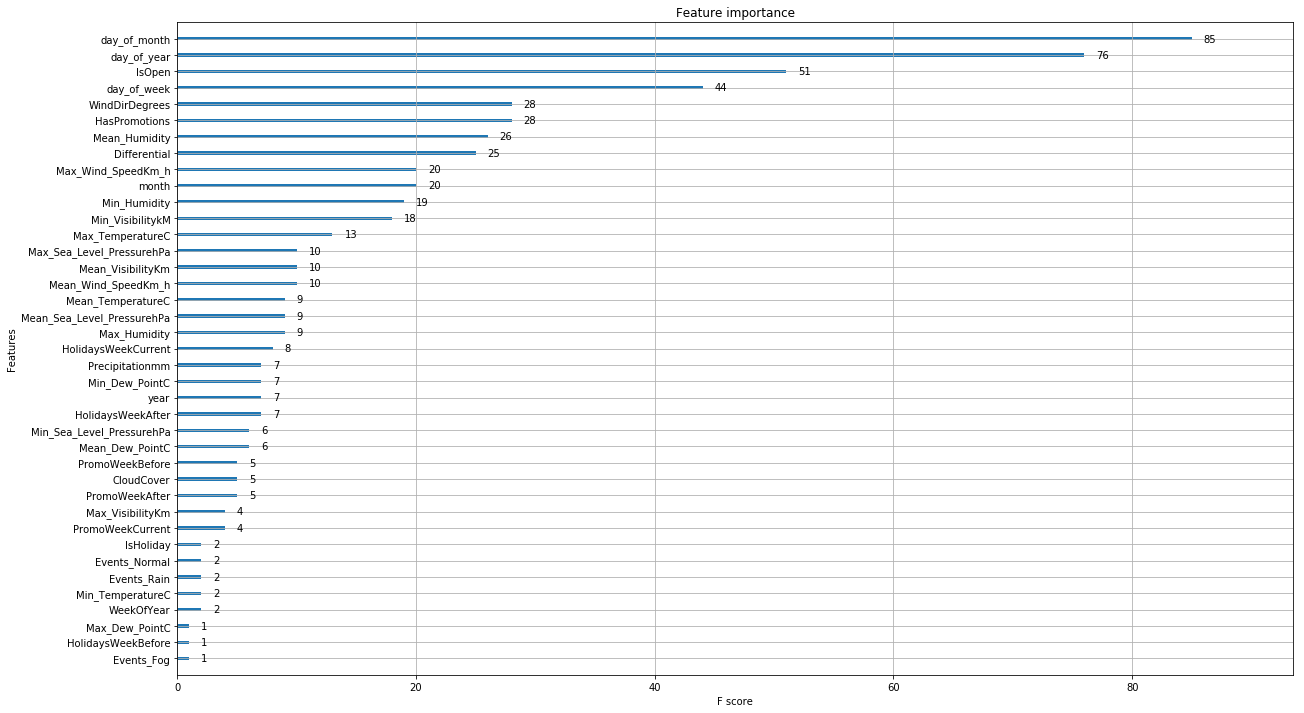

In [8]:
y_train = all_train[all_train.StoreID == 1000].NumberOfSales
x_train = all_train[all_train.StoreID == 1000].drop('NumberOfSales', axis = 1)

model = XGBRegressor(silent=False)
model.fit(x_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
plot_importance(model, ax=ax)

## Lanzi Error

### Fit model and make predictions

In [9]:
# train by month
def split_dataset_bymonth(test_year, test_months, train_set):
    test_mask = (train.year == test_year) & train.month.isin(test_months)
    
    # define the train set
    train_dataset = train[~test_mask]
    x_train = train_dataset.drop('NumberOfSales', axis=1)
    y_train = train_dataset.NumberOfSales
    
    # define the test set
    test_dataset = train[test_mask]
    x_test = test_dataset.drop('NumberOfSales', axis=1)
    y_test = test_dataset.NumberOfSales
    
    return (x_train, y_train, x_test, y_test)

In [10]:
scores = {}
predictions = defaultdict(dict)

for storeid in all_train.StoreID.unique():
    # define the model
    model = XGBRegressor(silent=False)
    
    # split the dataset
    train = all_train[all_train.StoreID == storeid]
    
    x_train, y_train, x_test, y_test =\
    split_dataset_bymonth(2018, [1, 2], train)
    
    # train the model with the training set
    model.fit(x_train, y_train)
    
    # scoring
    scores[storeid] = r2_score(y_test, model.predict(x_test))
    print('store {} -> {:.4f}'.format(storeid, scores[storeid]))
    
    # predict the test set with the trained model
    for month in x_test.month.unique():
        # get daily predictions for each month in the test set
        month_prediction = model.predict(x_test[x_test.month == month])
        month_actual = y_test.loc[x_test[x_test.month == month].index].values
        
        # store the monthly mean of the test set
        predictions[storeid][month] = {
            'predicted': np.mean(month_prediction),
            'actual': np.mean(month_actual)
        }

store 1000 -> 0.8652
store 1001 -> 0.5923
store 1002 -> 0.9507
store 1003 -> 0.9390
store 1004 -> 0.9075
store 1005 -> 0.9011
store 1006 -> 0.8960
store 1007 -> 0.9314
store 1008 -> 0.0465
store 1009 -> 0.9304
store 1010 -> 0.9031
store 1011 -> 0.8322
store 1012 -> 0.9433
store 1013 -> 0.9634
store 1014 -> 0.8061
store 1015 -> 0.9046
store 1016 -> 0.8560
store 1017 -> 0.9498
store 1018 -> 0.9424
store 1019 -> 0.9357
store 1020 -> 0.9071
store 1021 -> 0.9493
store 1022 -> 0.9673
store 1023 -> 0.8875
store 1024 -> 0.9308
store 1025 -> 0.8855
store 1026 -> 0.9428
store 1027 -> 0.9427
store 1028 -> 0.8730
store 1029 -> 0.8482
store 1030 -> 0.9187
store 1031 -> 0.8863
store 1032 -> 0.9274
store 1033 -> 0.9632
store 1034 -> 0.9064
store 1035 -> 0.9214
store 1036 -> 0.9308
store 1037 -> 0.1532
store 1038 -> 0.9290
store 1039 -> 0.9628
store 1040 -> 0.9447
store 1041 -> 0.9422
store 1042 -> 0.8619
store 1043 -> 0.9190
store 1044 -> 0.9181
store 1045 -> 0.9299
store 1046 -> 0.9277
store 1047 ->

store 1391 -> 0.8892
store 1392 -> 0.9555
store 1393 -> 0.9565
store 1394 -> 0.9358
store 1395 -> 0.9199
store 1396 -> 0.9490
store 1397 -> 0.9378
store 1398 -> 0.9502
store 1399 -> 0.8978
store 1400 -> 0.9251
store 1401 -> 0.9212
store 1402 -> 0.9641
store 1403 -> 0.9032
store 1404 -> 0.9701
store 1405 -> 0.9529
store 1406 -> 0.8046
store 1407 -> 0.6616
store 1408 -> 0.9048
store 1409 -> 0.8467
store 1410 -> 0.8412
store 1411 -> 0.9016
store 1412 -> 0.9763
store 1413 -> 0.8845
store 1414 -> 0.9504
store 1415 -> 0.9237
store 1416 -> 0.9228
store 1417 -> 0.8940
store 1418 -> 0.9475
store 1419 -> 0.9124
store 1420 -> 0.9639
store 1421 -> 0.9188
store 1422 -> 0.6838
store 1423 -> 0.9452
store 1424 -> 0.8640
store 1425 -> 0.9571
store 1426 -> 0.9411
store 1427 -> 0.9336
store 1428 -> 0.9453
store 1429 -> 0.7693
store 1430 -> 0.8384
store 1431 -> 0.9456
store 1432 -> 0.8995
store 1433 -> 0.8631
store 1434 -> 0.9424
store 1435 -> 0.9115
store 1436 -> 0.9146
store 1437 -> 0.9508
store 1438 ->

### Compute Lanzi error

In [11]:
# set of regions
R = sorted(all_train_orig.Region.unique().astype(int))
# set of predicted months
months = [key for key, value in predictions[1000].items()]
# set of stores by region
dict_store_byRegion = all_train_orig[['Region', 'StoreID']].drop_duplicates()\
.set_index('StoreID').groupby('Region').groups

# region_error inputs:
#
# int region = a number from 0 to 11
# dict predictions = {
#     int storeID: {
#         int month: {
#             str 'predicted': float,
#             str 'actual': float
#         }
#         ...
#     }
#     ...
# }
def region_error(region, predictions):    
    num = 0
    den = 0
    for store in dict_store_byRegion[str(region)]:
        for month in months:
            predicted = predictions[store][month]['predicted']
            actual = predictions[store][month]['actual']
            
            num += abs(actual - predicted)
            den += actual
    
    return num/den
    
# total_error input:
#
# region_errors = [0.3, 0.5, ... ]
def total_error(region_errors):
    return sum(region_errors)/len(region_errors)

def lanzi_error(predictions):
    region_errors = []
    for r in R:
        region_errors.append(region_error(r, predictions))
    
    return total_error(region_errors)

AttributeError: 'DataFrame' object has no attribute 'Region'

In [ ]:
print('Lanzi error: {}'.format(lanzi_error(predictions)))